<div style="text-align: center; font-size: 30px; font-weight: bold; padding:20px">University of London: BSc Computer Science (Final Project)</div>
<div style="text-align: center; font-size: 30px; margin-top: 10px;">Using Neural Network based Graph Model for Alzhiemer's Classification</div>
<br>
<div style="text-align: center; font-size: 20px; margin-top: 10px;">Pragya Modi</div>
<div style="text-align: center; font-size: 20px; margin-top: 15px;">190308090</div>

<div style="font-size: 70px; font-weight: bold; border-bottom: 6px solid black; padding-bottom:20px ">3. Fine-tuning the Models</div>


<div style="font-size: 30px; padding:10px">
<h1>3.1 Overview</h1>

<p>
This project follows the Universal Workflow of Machine Learning (UWML) as defined in the Deep Learning with Python Book <code>[1]</code>.
</p>

<p>
In the previous notebook, the following sections were covered: establishing a baseline, building a model that beats the baseline, and building a model that overfits. 
</p>

<p>
This notebook focuses on fine-tuning the model to get as high accuracy as possible.
</p>

<p> This notebooks is a collection of all the models that performerd better than the previous one. Parameteres in each of these models were changed to identify the ones with which the model performs better. </p>

<p> Furthermore, the models were chosen based on the heighest accuracy they achieved, the consistency of the model, the loss and accuracy plots, and the number of trainable parameters. </p>
</div>


<div style="font-size: 30px; padding:10px">
<h1>3.2 Splitting the Data</h1>
</div>

In [2]:
# imports
import tensorflow as tf
from tensorflow.keras import layers, utils
from matplotlib import pyplot as plt
import os, shutil, pathlib
from tensorflow import keras
import numpy as np

import helpers

In [3]:
# load the tensorflow dataset
dataset = tf.data.experimental.load('../data/tfdataset/final_dataset.tfrecords.gz', compression='GZIP')

# print the size of the dataset
dataset_size = 0
for _ in dataset: dataset_size += 1
print(dataset_size)

# define the train, val, and test split ratios
train_size = int(0.6 * dataset_size)
val_size = int(0.15 * dataset_size)

# shuffle the dataset
dataset = dataset.shuffle(buffer_size=dataset_size)

# use the helper function to split the dataset
train_dataset, val_dataset, test_dataset = helpers.split_data(dataset, train_size, val_size)

image_input = keras.Input(shape=(128, 128, 1), name='images')
feature_input = keras.Input(shape=(7), name='features')

2022-09-01 07:54:08.707966: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-01 07:54:08.708090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-01 07:54:08.736049: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

4014


<div style="font-size: 30px; padding:10px">
<h1>3.3 Tweaking Learning Rate</h1>
</div>


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 64  640         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 64)   0           ['conv2d[0][0]']                 
                                                                                              

2022-09-01 01:48:17.354872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/301 [============================>.] - ETA: 0s - loss: 0.7242 - accuracy: 0.5462

2022-09-01 01:48:30.178812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 15s 43ms/step - loss: 0.7237 - accuracy: 0.5469 - val_loss: 0.6760 - val_accuracy: 0.6047
Epoch 2/30
301/301 [==============================] - 12s 40ms/step - loss: 0.6804 - accuracy: 0.5735 - val_loss: 0.6671 - val_accuracy: 0.6047
Epoch 3/30
301/301 [==============================] - 12s 40ms/step - loss: 0.6643 - accuracy: 0.6084 - val_loss: 0.6608 - val_accuracy: 0.6329
Epoch 4/30
301/301 [==============================] - 12s 40ms/step - loss: 0.6458 - accuracy: 0.6329 - val_loss: 0.6851 - val_accuracy: 0.6412
Epoch 5/30
301/301 [==============================] - 12s 40ms/step - loss: 0.6354 - accuracy: 0.6545 - val_loss: 0.6019 - val_accuracy: 0.6877
Epoch 6/30
301/301 [==============================] - 12s 40ms/step - loss: 0.6277 - accuracy: 0.6545 - val_loss: 0.6225 - val_accuracy: 0.6728
Epoch 7/30
301/301 [==============================] - 12s 40ms/step - loss: 0.6192 - accuracy: 0.6636 - val_loss: 0.5982 - val_accuracy: 0.6711
Epo

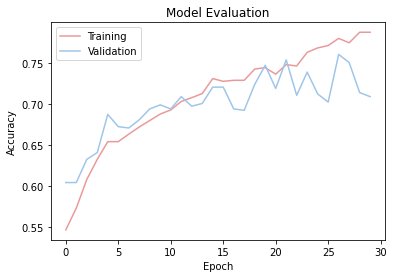

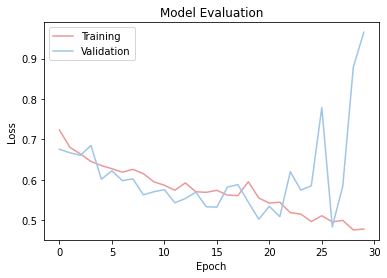

In [3]:
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(256, activation="relu")(z)
z = layers.Dense(128, activation="relu")(z)
z = layers.Dense(64, activation="relu")(z)
z = layers.Dense(1, activation="sigmoid")(z)

helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
    epochs=30
)

<div style="font-size: 30px; padding:10px">
<h1>3.4 Changing the Number of Layers in the Image Node</h1>
</div>


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 126, 126, 32  320         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 63, 63, 32)  0           ['conv2d_3[0][0]']               
                                                                                            

2022-09-01 01:54:39.386122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/301 [============================>.] - ETA: 0s - loss: 0.8030 - accuracy: 0.5458

2022-09-01 01:54:46.927866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 9s 23ms/step - loss: 0.8022 - accuracy: 0.5465 - val_loss: 0.6959 - val_accuracy: 0.6047
Epoch 2/30
301/301 [==============================] - 7s 23ms/step - loss: 0.6876 - accuracy: 0.5573 - val_loss: 0.6957 - val_accuracy: 0.6047
Epoch 3/30
301/301 [==============================] - 7s 22ms/step - loss: 0.6806 - accuracy: 0.5706 - val_loss: 0.6753 - val_accuracy: 0.6080
Epoch 4/30
301/301 [==============================] - 7s 22ms/step - loss: 0.6773 - accuracy: 0.5839 - val_loss: 0.6600 - val_accuracy: 0.6229
Epoch 5/30
301/301 [==============================] - 7s 22ms/step - loss: 0.6601 - accuracy: 0.6204 - val_loss: 0.6310 - val_accuracy: 0.6578
Epoch 6/30
301/301 [==============================] - 7s 22ms/step - loss: 0.6041 - accuracy: 0.6881 - val_loss: 0.5727 - val_accuracy: 0.7076
Epoch 7/30
301/301 [==============================] - 7s 23ms/step - loss: 0.5246 - accuracy: 0.7566 - val_loss: 0.4909 - val_accuracy: 0.7691
Epoch 8/30

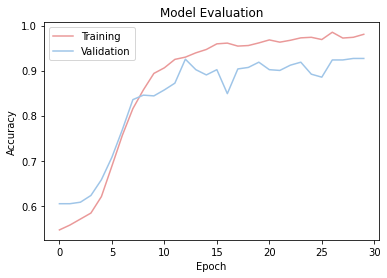

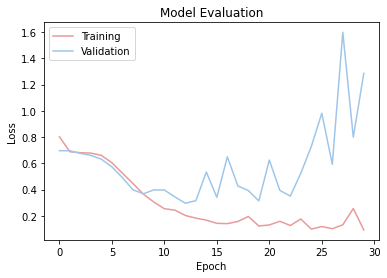

In [4]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(256, activation="relu")(z)
z = layers.Dense(128, activation="relu")(z)
z = layers.Dense(64, activation="relu")(z)
z = layers.Dense(1, activation="sigmoid")(z)

helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
)

<div style="font-size: 30px; padding:10px">
<h1>3.5 Chnaging Layer Weights in the Concatenated Node </h1>
</div>


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 126, 126, 32  320         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 63, 63, 32)  0           ['conv2d_13[0][0]']              
 )                                                                                          

2022-09-01 02:02:16.409490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/301 [============================>.] - ETA: 0s - loss: 0.8688 - accuracy: 0.5342

2022-09-01 02:02:23.836307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 8s 24ms/step - loss: 0.8678 - accuracy: 0.5349 - val_loss: 0.7270 - val_accuracy: 0.6047
Epoch 2/30
301/301 [==============================] - 7s 22ms/step - loss: 0.6898 - accuracy: 0.5623 - val_loss: 0.6961 - val_accuracy: 0.6080
Epoch 3/30
301/301 [==============================] - 7s 22ms/step - loss: 0.6808 - accuracy: 0.5814 - val_loss: 0.6611 - val_accuracy: 0.6395
Epoch 4/30
301/301 [==============================] - 6s 21ms/step - loss: 0.6725 - accuracy: 0.6055 - val_loss: 0.6291 - val_accuracy: 0.6512
Epoch 5/30
301/301 [==============================] - 7s 22ms/step - loss: 0.6480 - accuracy: 0.6362 - val_loss: 0.6145 - val_accuracy: 0.6528
Epoch 6/30
301/301 [==============================] - 6s 21ms/step - loss: 0.6220 - accuracy: 0.6694 - val_loss: 0.5782 - val_accuracy: 0.6944
Epoch 7/30
301/301 [==============================] - 6s 21ms/step - loss: 0.5601 - accuracy: 0.7259 - val_loss: 0.5489 - val_accuracy: 0.7292
Epoch 8/30

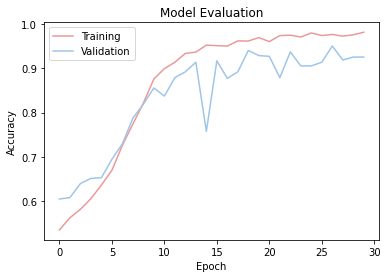

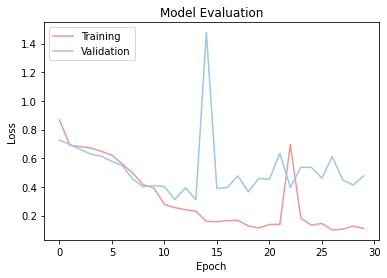

In [6]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(512, activation="relu")(z)
z = layers.Dense(256, activation="relu")(z)
z = layers.Dense(1, activation="sigmoid")(z)

helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
)

<div style="font-size: 30px; padding:10px">
<h1>3.6 Adding Dense Layer to Image Node </h1>
</div>

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 126, 126, 32  320         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d_14 (MaxPooling2D  (None, 63, 63, 32)  0           ['conv2d_18[0][0]']              
 )                                                                                          

2022-09-01 02:05:41.432085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - ETA: 0s - loss: 0.7666 - accuracy: 0.5440

2022-09-01 02:05:49.604492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 9s 26ms/step - loss: 0.7666 - accuracy: 0.5440 - val_loss: 0.6882 - val_accuracy: 0.6047
Epoch 2/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6894 - accuracy: 0.5602 - val_loss: 0.6919 - val_accuracy: 0.6047
Epoch 3/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6808 - accuracy: 0.5764 - val_loss: 0.6542 - val_accuracy: 0.6312
Epoch 4/30
301/301 [==============================] - 7s 25ms/step - loss: 0.6718 - accuracy: 0.5997 - val_loss: 0.6333 - val_accuracy: 0.6445
Epoch 5/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6644 - accuracy: 0.6100 - val_loss: 0.6297 - val_accuracy: 0.6545
Epoch 6/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6771 - accuracy: 0.6042 - val_loss: 0.6231 - val_accuracy: 0.6561
Epoch 7/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6490 - accuracy: 0.6333 - val_loss: 0.5938 - val_accuracy: 0.6661
Epoch 8/30

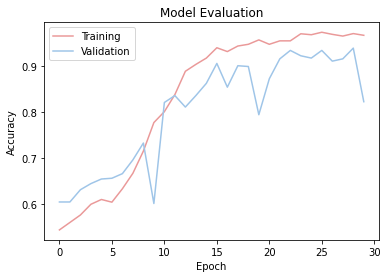

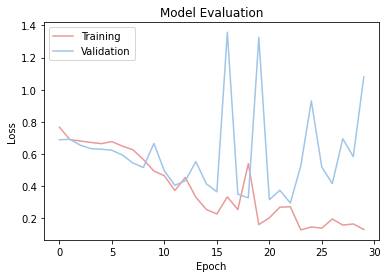

In [7]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(512, activation="relu")(z)
z = layers.Dense(256, activation="relu")(z)
z = layers.Dense(1, activation="sigmoid")(z)

helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
)

<div style="font-size: 30px; padding:10px">
<h1>3.7 Adding Dropout to Image Node </h1>
</div>

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 126, 126, 32  320         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d_18 (MaxPooling2D  (None, 63, 63, 32)  0           ['conv2d_23[0][0]']              
 )                                                                                          

2022-09-01 02:09:27.495521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - ETA: 0s - loss: 0.7788 - accuracy: 0.5478

2022-09-01 02:09:36.255857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 10s 27ms/step - loss: 0.7788 - accuracy: 0.5478 - val_loss: 0.6916 - val_accuracy: 0.6047
Epoch 2/30
301/301 [==============================] - 8s 25ms/step - loss: 0.6907 - accuracy: 0.5610 - val_loss: 0.6742 - val_accuracy: 0.6047
Epoch 3/30
301/301 [==============================] - 7s 25ms/step - loss: 0.6834 - accuracy: 0.5785 - val_loss: 0.6566 - val_accuracy: 0.6312
Epoch 4/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6738 - accuracy: 0.5939 - val_loss: 0.6515 - val_accuracy: 0.6412
Epoch 5/30
301/301 [==============================] - 8s 26ms/step - loss: 0.6630 - accuracy: 0.6163 - val_loss: 0.6307 - val_accuracy: 0.6478
Epoch 6/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6520 - accuracy: 0.6350 - val_loss: 0.6086 - val_accuracy: 0.6645
Epoch 7/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6198 - accuracy: 0.6761 - val_loss: 0.5760 - val_accuracy: 0.6993
Epoch 8/3

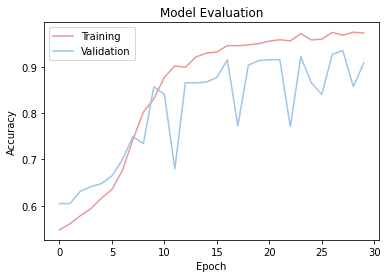

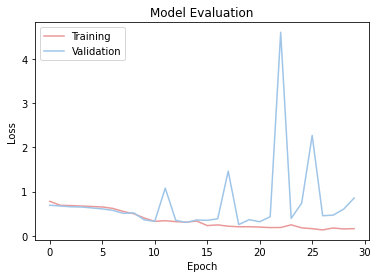

In [8]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(128, activation="relu")(x)

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(512, activation="relu")(z)
z = layers.Dense(256, activation="relu")(z)
z = layers.Dense(1, activation="sigmoid")(z)

helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
)

<div style="font-size: 30px; padding:10px">
<h1>3.8 Adding Dropout to Features Node </h1>
</div>

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_33 (Conv2D)             (None, 126, 126, 32  320         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d_26 (MaxPooling2D  (None, 63, 63, 32)  0           ['conv2d_33[0][0]']              
 )                                                                                          

2022-09-01 02:18:57.126684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/301 [============================>.] - ETA: 0s - loss: 0.7817 - accuracy: 0.5400

2022-09-01 02:19:06.514865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 11s 27ms/step - loss: 0.7811 - accuracy: 0.5407 - val_loss: 0.6797 - val_accuracy: 0.6047
Epoch 2/30
301/301 [==============================] - 7s 25ms/step - loss: 0.6878 - accuracy: 0.5681 - val_loss: 0.6791 - val_accuracy: 0.6047
Epoch 3/30
301/301 [==============================] - 7s 25ms/step - loss: 0.6855 - accuracy: 0.5677 - val_loss: 0.6720 - val_accuracy: 0.6063
Epoch 4/30
301/301 [==============================] - 8s 25ms/step - loss: 0.6758 - accuracy: 0.5943 - val_loss: 0.6627 - val_accuracy: 0.6229
Epoch 5/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6670 - accuracy: 0.6142 - val_loss: 0.6438 - val_accuracy: 0.6429
Epoch 6/30
301/301 [==============================] - 7s 24ms/step - loss: 0.6463 - accuracy: 0.6271 - val_loss: 0.6230 - val_accuracy: 0.6545
Epoch 7/30
301/301 [==============================] - 7s 25ms/step - loss: 0.6108 - accuracy: 0.6877 - val_loss: 0.6037 - val_accuracy: 0.6860
Epoch 8/3

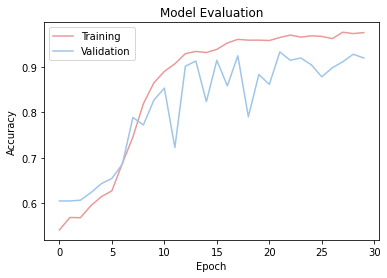

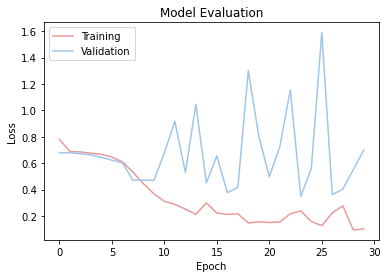

In [10]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(128, activation="relu")(x)

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dropout(0.1)(y)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(512, activation="relu")(z)
z = layers.Dense(256, activation="relu")(z)
z = layers.Dense(1, activation="sigmoid")(z)

helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
)

<div style="font-size: 30px; padding:10px">
<h1>3.9 Using L1 and L2 Regularizer </h1>
</div>

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

2022-09-01 07:54:16.806217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/301 [============================>.] - ETA: 0s - loss: 2.8164 - accuracy: 0.5442

2022-09-01 07:54:26.789194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 12s 32ms/step - loss: 2.8097 - accuracy: 0.5440 - val_loss: 0.7631 - val_accuracy: 0.5864
Epoch 2/30
301/301 [==============================] - 8s 28ms/step - loss: 0.7071 - accuracy: 0.5714 - val_loss: 0.6808 - val_accuracy: 0.5864
Epoch 3/30
301/301 [==============================] - 8s 27ms/step - loss: 0.6860 - accuracy: 0.5718 - val_loss: 0.6755 - val_accuracy: 0.5864
Epoch 4/30
301/301 [==============================] - 8s 27ms/step - loss: 0.6829 - accuracy: 0.5752 - val_loss: 0.6715 - val_accuracy: 0.5880
Epoch 5/30
301/301 [==============================] - 8s 27ms/step - loss: 0.6797 - accuracy: 0.5864 - val_loss: 0.6674 - val_accuracy: 0.5997
Epoch 6/30
301/301 [==============================] - 8s 26ms/step - loss: 0.6778 - accuracy: 0.5947 - val_loss: 0.6636 - val_accuracy: 0.6063
Epoch 7/30
301/301 [==============================] - 8s 26ms/step - loss: 0.6766 - accuracy: 0.5926 - val_loss: 0.6562 - val_accuracy: 0.6196
Epoch 8/3

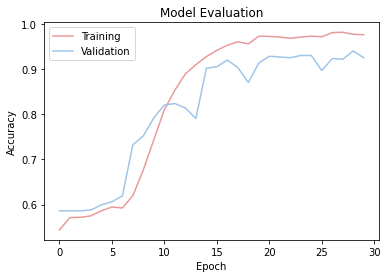

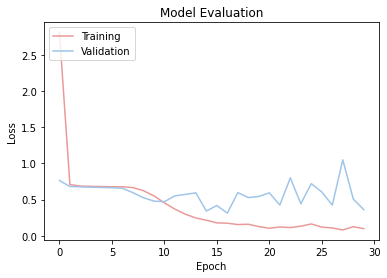

(<keras.callbacks.History at 0x168e03d30>,
 <keras.engine.functional.Functional at 0x168e1adc0>)

In [4]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(128, activation="relu")(x)

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dropout(0.1)(y)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.00002))(z)
z = layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.00002))(z)
z = layers.Dense(1, activation="sigmoid")(z)

helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
)

<div style="font-size: 30px; padding:10px">
<h1>3.11 Summary</h1>

<p>
This notebook was aimed at building a model that beats the baseline and another that overfits. These models have been built successfully in this notebook. A summary for both these models is provided below. 
</p>

<p> As mentioned earlier, the highest accuracy was only on of the factors taken into account when deciding on the model performance. While in some models, the highest validation accuracy decreases, these is a significant increase in the stability of performance in the model. </p>

<table>
<thead>
  <tr>
    <th>Model</th>
    <th>Highest Validation Accuracy</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>tweaking_lr_model</td>
    <td>75.42%</td>
  </tr>
  <tr>
    <td>adding_layers_image_node</td>
    <td>92.69%</td>
  </tr>
  <tr>
    <td>changing_layer_weights</td>
    <td>94.02%</td>
  </tr>
  <tr>
    <td>adding_dense_layers</td>
    <td>93.36%</td>
  </tr>
  <tr>
    <td>adding_dropout</td>
    <td>93.52%</td>
  </tr>
  <tr>
    <td>adding_dropout_2</td>
    <td>92.86%</td>
  </tr>
  <tr>
    <td>using_l2_reg</td>
    <td>94.02%</td>
  </tr>
</tbody>
</table>

<h1>3.12 References</h1>

<p>[1] Chollet, François. Deep Learning With Python (1st ed.). </p>

<br>

<p>[2] Pamela J. LaMontagne, Tammie LS. Benzinger, John C. Morris, Sarah Keefe, Russ Hornbeck, Chengjie Xiong, Elizabeth Grant, Jason Hassenstab, Krista Moulder, Andrei G. Vlassenko, Marcus E. Raichle, Carlos Cruchaga, and Daniel Marcus. 2019. OASIS-3: Longitudinal Neuroimaging, Clinical, and Cognitive Dataset for Normal Aging and Alzheimer Disease. Radiology and Imaging. DOI:https://doi.org/10.1101/2019.12.13.19014902 </p>


</div>

----
<div style="text-align: center; font-size: 30px; font-weight: bold; padding:20px">End of File</div>

----